# Chapter 7: Statistical hypothesis testing

In [2]:
# Statistical Hypothesis Test: Choosing between two competing hypothesis based on data
# 7.1 Assessing the divergence between sample mean and population mean
# Population mean and variance of North Dakota grades
population_mean = 80
population_variance = 100

In [3]:
# Null Hypothesis: Assume that the thing we are testing is just an outlier, within reasonable bounds
# Alternative Hypothesis: Assume that the thing we are not testing is not just an outlier, through statistical testing
# Normal curve parameters if the null hypothesis is true
mean = population_mean
sem = (population_variance / 18) ** 0.5

In [4]:
import scipy
from scipy import stats

In [7]:
# Finding the probability of a high-performance grade
prob_high_grade = stats.norm.sf(84, mean, sem)
print(f"Probability of an average grade >= 84 is {prob_high_grade}")

Probability of an average grade >= 84 is 0.044843010885182284


In [9]:
# Cumulative Distribution Function: Opposite to the survival function; is the area under a normal curve that ranges
#    from negative infinity to some number; stats.norm.cdf
# Finding the Probability of a low-performance grade
prob_low_grade = stats.norm.cdf(76, mean, sem)
print(f"Probability of an average grade <= 76 is {prob_low_grade}")
# Equal to the probability of a high grade class

Probability of an average grade <= 76 is 0.044843010885182284


In [11]:
import numpy as np
import matplotlib.pyplot as plt

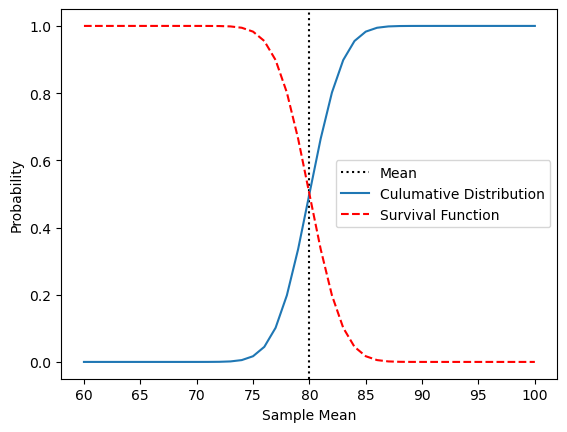

In [12]:
# Comparing the survival and cumulative distribution functions
for x in range(-100, 100):
    sf_value = stats.norm.sf(mean + x, mean, sem)
    assert sf_value == stats.norm.cdf(mean - x, mean, sem)
    
plt.axvline(mean, color='k', label='Mean', linestyle=':')
x_values = range(60, 101)
plt.plot(x_values, stats.norm.cdf(x_values, mean, sem), label="Culumative Distribution")
plt.plot(x_values, stats.norm.sf(x_values, mean, sem), label="Survival Function", linestyle='--', color='r')
plt.xlabel('Sample Mean')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [13]:
# P-Value: The probability of observing an extreme deviation from the population mean when the null hypothesis is true
# Computing the null-hypothesis-driven probability
p_value = prob_low_grade + prob_high_grade
assert p_value == 2 * prob_high_grade
print(f"The p-value is {p_value}")

The p-value is 0.08968602177036457


In [16]:
# Computing the p-value for an adjusted sample mean
def compute_p_value(observed_mean, population_mean, sem):
    mean_diff = abs(population_mean - observed_mean)
    prob_high = stats.norm.sf(population_mean + mean_diff, population_mean, sem)
    return 2 * prob_high

new_p_value = compute_p_value(85, mean, sem)
print(f"The updated p-value is {new_p_value}")

The updated p-value is 0.03389485352468927


In [19]:
# Significance Level: Reject the null hypothesis is less than some number (typically 0.05)
# Statistically Significant: If the p-value is less than the significance level (typically 0.05)
# Type 1 Error: An erroneous rejection of the null hypothesis (said it was significant when it wasn't)
# Type 2 Error: Wrongly reject the alternative hypothesis (said it wasn't significant when it was)

# Scanning for a stringent p-value result
for grade in range(80, 100):
    p_value = compute_p_value(grade, mean, sem)
    if p_value < 0.001:
        break

print(f"An average grade of {grade} leads to a p-value of {p_value}")

An average grade of 88 leads to a p-value of 0.0006885138966450773


In [20]:
# 7.2 Data Dredging: Coming to False Conclusions Through Oversampling
# Randomly sampling Montana's exam performance
np.random.seed(0)
random_average_grade = np.random.normal(mean, sem)
print(f"Average grade equals {random_average_grade:.2f}")

Average grade equals 84.16


In [21]:
# Testing the significance of Montana's exam performance
if compute_p_value(random_average_grade, mean, sem) <= 0.05:
    print(f"the observed result is statistically significant")
else:
    print(f"The observed result is not statistically significant")

The observed result is not statistically significant


In [23]:
# Randomly searching for a significant state result
np.random.seed(0)
for i in range(1, 49):
    print(f"We visited state {i + 1}")
    random_average_grade = np.random.normal(mean, sem)
    p_value = compute_p_value(random_average_grade, mean, sem)
    if p_value <= 0.05:
        print(f"We found a statistically significant result.")
        print(f"The average grade was {random_average_grade:.2f}")
        print(f"The p-value was {p_value}")
        break
        
if i == 48:
    print(f"We visited every state and found no significant results.")

We visited state 2
We visited state 3
We visited state 4
We visited state 5
We found a statistically significant result.
The average grade was 85.28
The p-value was 0.025032993883401307


In [25]:
# Data Dredging / Data Fishing / P-Hacking: Experiements are repeated over and over until a statistically significant 
#     result is found, the other "failed" experiments are discarded
# Bonferroni Correction: To avoid data dredging, set the number of experiments to run and make the threshold for
#     statistically significant results = 0.05 / number of experiments being run
# Using the Binferroni correction to adjust significance level
num_planned_experiments = 49
significance_level = 0.05 / 49

In [27]:
# Rerunning an analysis using an adjusted significance level
np.random.seed(0)
for i in range(1, 49):
    # print(f"We visited state {i + 1}")
    random_average_grade = np.random.normal(mean, sem)
    p_value = compute_p_value(random_average_grade, mean, sem)
    if p_value <= significance_level:
        print(f"We found a statistically significant result.")
        print(f"The average grade was {random_average_grade:.2f}")
        print(f"The p-value was {p_value}")
        break
        
if i == 48:
    print(f"We visited every state and found no significant results.")
# The correction worked to avoid a type 1 error!!

We visited every state and found no significant results.


In [30]:
# 7.3 Bootstrapping with replacement: Testing a hypothesis when a population variance is unknown
# Defining lengths of fish in an aquarium
fish_lengths = np.array([46.7, 17.1, 2.0, 19.2, 7.9, 15.0, 43.4, 8.8, 47.8, 19.5, 
                         2.9, 53.0, 23.5, 118.5, 3.8, 2.9, 53.9, 23.9, 2.0, 28.2])
assert fish_lengths.mean() == 27

In [31]:
# Bootstrapping With Replacement: Compute a p-value with limited data by
# Sampling a random fish from the aquarium and putting it into our tank (again)
np.random.seed(0)
random_fish_length = np.random.choice(fish_lengths, size=1)[0]
sampled_fish_lengths = [random_fish_length]

In [32]:
# Sampling 20 random fish with repetition
np.random.seed(0)
for _ in range(20):
    random_fish_length = np.random.choice(fish_lengths, size=1)[0]
    sampled_fish_lengths.append(random_fish_length)

In [33]:
# Comparing the sample mean to the aquarium mean
sample_mean = np.mean(sampled_fish_lengths)
print(f"Mean of sampled fish lengths is {sample_mean:.2f} cm")

Mean of sampled fish lengths is 26.03 cm


In [34]:
# Sampling with replacement unsing NumPy
np.random.seed(0)
# Replace is set to True by default; ensures items in selected set can be selected twice
new_sampled_fish_lengths = np.random.choice(fish_lenghts, size=20, replace=True)
new_sample_mean = new_sampled_fish_lengths.mean()
print(f"Mean of the new sampled fish lengths is {new_sample_mean:.2f} cm")

Mean of the new sampled fish lengths is 26.16 cm


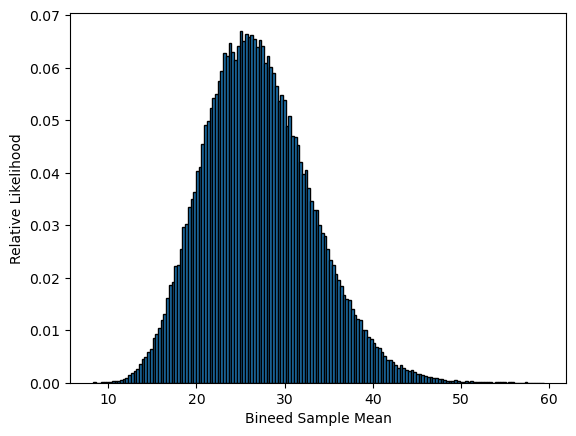

In [36]:
# Plotting the distribution of 150,000 sampled means with replacement
np.random.seed(0)
sample_means = [np.random.choice(fish_lenghts, size=20, replace=True).mean() for _ in range(150000)]
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', edgecolor='k', density=True)
plt.xlabel('Bineed Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [37]:
# Skew: One side rises faster than the other
# Can use stats.skew(sample_means) to find the skew; if it is more than 0.4 it is very unlikely to come from a normal distribution
# Computing the skew of an asymmetric distribution
assert abs(stats.skew(sample_means)) > 0.4
# Our data is skewed above 0.4, so we cannot use a normal distribution to model our data

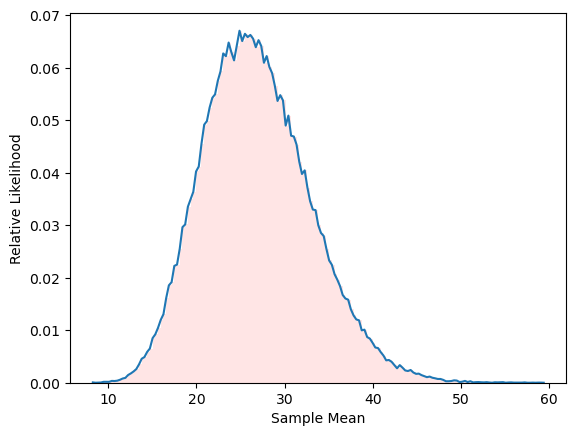

In [38]:
# Can still obtain probability density function, cumulative distribution function, and a survival function from
# this data and use stats.rv_histogram((likelihoods, bin_edges)) to get those items
# Fitting data to a generic distribution using SciPy
random_variable = stats.rv_histogram((likelihoods, bin_edges))
plt.plot(bin_edges, random_variable.pdf(bin_edges))
plt.hist(sample_means, bins='auto', alpha=0.1, color='r', density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

Mean of the distribution is approximately 27.00 cm


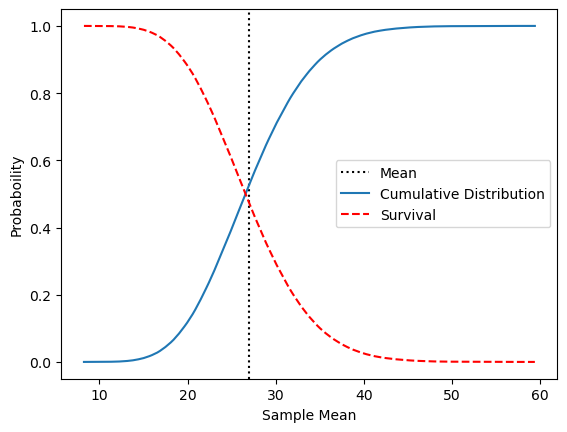

In [41]:
# Plotting the mean and interval areas for a generic distribution
rv_mean = random_variable.mean()
print(f"Mean of the distribution is approximately {rv_mean:.2f} cm")

plt.axvline(random_variable.mean(), color='k', label='Mean', linestyle=':')
plt.plot(bin_edges, random_variable.cdf(bin_edges), label='Cumulative Distribution')
plt.plot(bin_edges, random_variable.sf(bin_edges), label='Survival', linestyle='--', color='r')
plt.xlabel('Sample Mean')
plt.ylabel('Probaboility')
plt.legend()
plt.show()
# No longer symmetric as before because the data is skewed

In [42]:
# Computing the probability of an extreme sample mean
prob_extreme = random_variable.sf(37) + random_variable.cdf(17)
print(f"Probability of observing an extreme sample mean is approximately {prob_extreme:.2f}")

Probability of observing an extreme sample mean is approximately 0.10


In [44]:
# Using bootstrapping to estimate the SEM
estimated_sem = random_variable.std()
p_value = compute_p_value(27, 37, estimated_sem)
print(f"P-value computed from estimated SEM is approximately {p_value:.2f}")

P-value computed from estimated SEM is approximately 0.10


In [ ]:
# First two methods used to calculate the p-value from non-normal data:
# First Approach:
# 1. Sample with replacement from the data. Repeat tens of thousands of times to obtain a list of sample means
# 2. Generate a histogram from the sample means
# 3. Convert the histogram to a distribution using the stats.rv_histogram() method
# 4. Take the area beneath the left and right extremes of the distribution curve using the survival function and the
#    cumulative distribution function

# Second Approach:
# 1. Sample with replacement from the data. Repeat tens of thousands of times to obtain a list of sample means
# 2. Compute the standard deviation of the means to approximate the SEM
# 3. Use the estimated SEM to carry out basic hypothesis testing using our comput_p_value() function

# Third Approach: Law of Large Numbers
# Compute the frequency of extreme events
# Divide that num by the length of the sample_means
# P-value obtained

In [46]:
# Computing the p-value from direct counts
number_extreme_values = 0
for sample_mean in sample_means:
    if not 17 < sample_mean < 37:
        number_extreme_values += 1
        
p_value = number_extreme_values / len(sample_means)
print(f"P-value is approximately {p_value:.2f}")

P-value is approximately 0.10


In [47]:
# 7.4 Permutation testing: Comparing means of samples when the population parameters are unknown
# Defining lengths of fish in a new aquarium
new_fish_lengths = np.array([51, 46.5, 51.6, 47, 54.4, 40.5, 43, 43.1, 35.9, 47.0])
assert new_fish_lengths.mean() == 46

In [48]:
# Computing the difference between two sample means
mean_diff = abs(new_fish_lengths.mean() - fish_lengths.mean())
print(f"There is a {mean_diff:.2f} cm difference between the two means")

There is a 19.00 cm difference between the two means


In [49]:
# Permutation Test: mean_diff is used to compute statistical significance; Like bootstrapping, requires random sampling
# Merging the two fish sets into one using np.hstack
total_fish_lengths = np.hstack([fish_lengths, new_fish_lengths])
assert total_fish_lengths.size == 30

In [50]:
# Shuffling the positions of the merged fish
np.random.seed(0)
np.random.shuffle(total_fish_lengths)

In [52]:
# Computing the difference between two random sample means
random_20_fish_lengths = total_fish_lengths[:20]
random_10_fish_lengths = total_fish_lengths[20:]
mean_diff = random_20_fish_lengths.mean() - random_10_fish_lengths.mean()
print(f"The new difference between mean fish lengths is {mean_diff:.2f}")

The new difference between mean fish lengths is 14.33


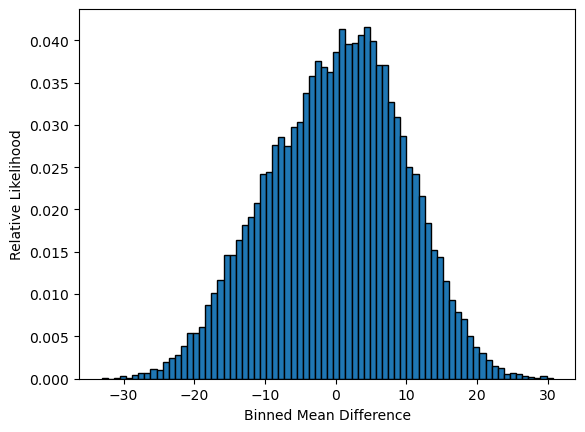

In [53]:
# Plotting the fluctuating difference between means
np.random.seed(0)
mean_diffs = []
for _ in range(30000):
    np.random.shuffle(total_fish_lengths)
    mean_diff = total_fish_lengths[:20].mean() - total_fish_lengths[20:].mean()
    mean_diffs.append(mean_diff)
    
likelihoods, bin_edges, _ = plt.hist(mean_diffs, bins='auto', edgecolor='k', density=True)
plt.xlabel('Binned Mean Difference')
plt.ylabel('Relative Likelihood')
plt.show()

In [54]:
# Fitting the histogram to a random variable (with stats.rv_histogram)
random_variable = stats.rv_histogram((likelihoods, bin_edges))

In [58]:
# Define extremes as a difference betweeen means whose absolute value is at least 19 cm
# Computing the permutation p-value
p_value = random_variable.sf(19) + random_variable.cdf(-19)
print(f"P-value is approximately {p_value:.2f}")
# p-value is below 0.05, so the 10 fish came from another tank

P-value is approximately 0.04


In [60]:
# Computing the permutation p-value from direct counts
number_extreme_values = 0.0
for min_diff in mean_diffs:
    if not -19 < min_diff < 19:
        number_extreme_values += 1

p_value = number_extreme_values / len(mean_diffs)
print(f"P-value is approximately {p_value:.2f}")
# ***********************************************************
# Good for comparing click counts

P-value is approximately 0.04


In [61]:
# Key Words / Notes:
# Null Hypothesis: Assume the pair of populations are identical
# Alternative Hypothesis: Assume the pair of populations are not identical
# P-Value: The probability of observing our data when the null hypothesis is true
# Significance Level: Number to compare to the p-value to test for statistical significance (typically 0.05)
# Type 1 Error: Rejecting the null hypothesis when the null hypothesis is true
# Type 2 Error: Accepting the null hypothesis when the null hypothesis is false
# Data Dredging: Repeating an experiment until a p-value is found that is below the significance level and disgarding 
#    the other "failed" experiments; increases likelihood of type 1 errors a lot
# Bonferroni Correction: Significance level divided by experiment count
# We can estimate the population variance, required to calculate the SEM, we can estimate the SEM using the bootstrapping
#    with replacement
# Permutation Test: Compare the means of two distinct samples